In [3]:
!pip uninstall pystan

Found existing installation: pystan 3.3.0
Uninstalling pystan-3.3.0:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/pystan-3.3.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/stan/*
Proceed (Y/n)? Y
  Successfully uninstalled pystan-3.3.0


In [7]:
!pip install pystan==2.17.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pystan-2.17.1.0.tar.gz (13.9 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.17.1.0-cp38-cp38-linux_x86_64.whl size=53762635 sha256=1db602bf1084e39928dcf30bce1ac3c914c9686a0124b19894c2663675a6fe7e
  Stored in directory: /root/.cache/pip/wheels/88/63/b8/bac604de655a34faff2677993cd5c57f2377a0418f5848eebf
Successfully built pystan


In [8]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=8564830 sha256=ab6c82eba7a4714f6cbdb22264e8c57c49097f8d23af882ef6ada1878b169fff
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet


In [9]:
# Steps
# 1. Load data into a pandas dataframe
# 2. Train model using facebook prophet
# 3. Make future dataframes and forecast forward.

import warnings
warnings.simplefilter('ignore')

In [10]:
## dataset--> https://raw.githubusercontent.com/nicknochnack/TimeSeriesForecastingProphet/main/dataset.csv

# Installing the dependencies 
import pandas as pd
from fbprophet import Prophet

# Reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/nicknochnack/TimeSeriesForecastingProphet/main/dataset.csv')


In [11]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [12]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [13]:
df['Product'].unique()

array([2667437])

In [14]:
df['Store'].unique()

array(['QLD_CW_ST0203'], dtype=object)

In [15]:
# Data processing
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [16]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

df.head()


,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [17]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns

Index(['Value', 'ds'], dtype='object')

In [18]:
df.columns=['y', 'ds']

In [19]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [20]:
# Model training
m = Prophet(interval_width=0.95, daily_seasonality=True) # define the model
model = m.fit(df) # got fit model

In [21]:
# Forecasting
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3040.462653,862.470874,3970.094597,3040.462653,3040.462653,-645.839364,-645.839364,-645.839364,463.68979,...,16.643716,16.643716,16.643716,-1126.172870,-1126.172870,-1126.172870,0.0,0.0,0.0,2394.623289
1,2018-01-02,3041.255696,770.515339,3960.033527,3041.255696,3041.255696,-655.816581,-655.816581,-655.816581,463.68979,...,-11.263085,-11.263085,-11.263085,-1108.243287,-1108.243287,-1108.243287,0.0,0.0,0.0,2385.439115
2,2018-01-03,3042.048740,831.381753,3935.306576,3042.048740,3042.048740,-629.836306,-629.836306,-629.836306,463.68979,...,-4.394888,-4.394888,-4.394888,-1089.131208,-1089.131208,-1089.131208,0.0,0.0,0.0,2412.212434
3,2018-01-04,3042.841783,858.112647,4134.290958,3042.841783,3042.841783,-582.757660,-582.757660,-582.757660,463.68979,...,22.467514,22.467514,22.467514,-1068.914964,-1068.914964,-1068.914964,0.0,0.0,0.0,2460.084123
4,2018-01-05,3043.634827,863.972667,4059.108428,3043.634827,3043.634827,-618.630432,-618.630432,-618.630432,463.68979,...,-34.594707,-34.594707,-34.594707,-1047.725516,-1047.725516,-1047.725516,0.0,0.0,0.0,2425.004394


In [23]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4241.364176,2009.441638,5266.337879,4238.326972,4244.253223,-518.137410,-518.137410,-518.137410,463.68979,...,16.643716,16.643716,16.643716,-998.470917,-998.470917,-998.470917,0.0,0.0,0.0,3723.226765
1176,2021-03-23,4242.434777,2050.379616,5242.517385,4239.346079,4245.379685,-535.598019,-535.598019,-535.598019,463.68979,...,-11.263085,-11.263085,-11.263085,-988.024724,-988.024724,-988.024724,0.0,0.0,0.0,3706.836758
1177,2021-03-24,4243.505378,2215.805289,5254.673574,4240.377854,4246.491029,-521.063000,-521.063000,-521.063000,463.68979,...,-4.394888,-4.394888,-4.394888,-980.357903,-980.357903,-980.357903,0.0,0.0,0.0,3722.442378
1178,2021-03-25,4244.575980,2170.948051,5409.284026,4241.399650,4247.594102,-489.896577,-489.896577,-489.896577,463.68979,...,22.467514,22.467514,22.467514,-976.053882,-976.053882,-976.053882,0.0,0.0,0.0,3754.679403
1179,2021-03-26,4245.646581,2060.144148,5236.217269,4242.401784,4248.696872,-546.515985,-546.515985,-546.515985,463.68979,...,-34.594707,-34.594707,-34.594707,-975.611069,-975.611069,-975.611069,0.0,0.0,0.0,3699.130596


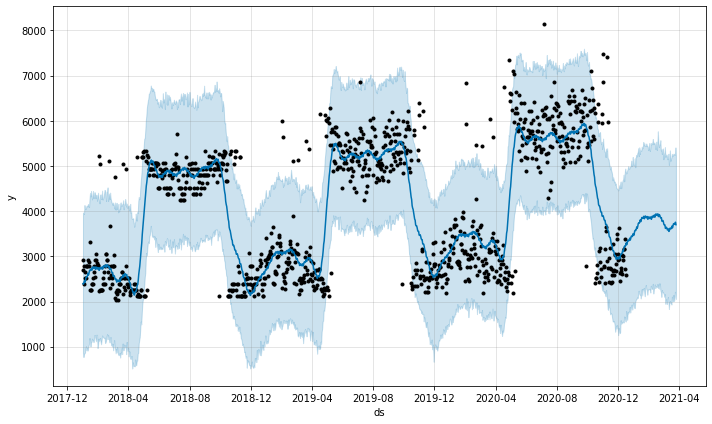

In [24]:
plot1 = m.plot(forecast)

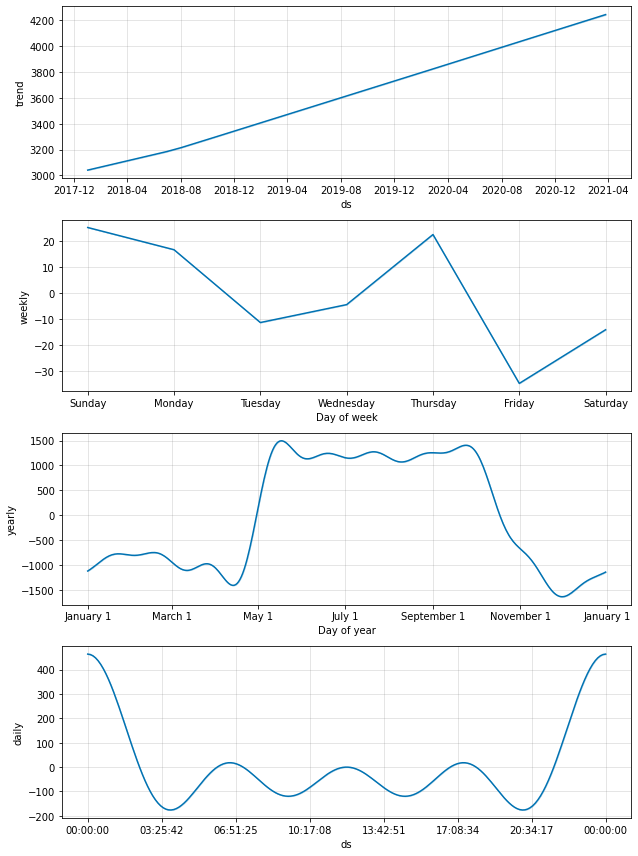

In [25]:
plot2 = m.plot_components(forecast)